In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [110]:
df=pd.read_csv("market_pipe_thickness_loss_dataset.csv")

Veamos que datos tenemos en nuestro archivo

In [111]:
df.head()

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical


In [112]:
#Veamos que tipo de datos tenemos 
print(df.dtypes)

Pipe_Size_mm                  int64
Thickness_mm                float64
Material                     object
Grade                        object
Max_Pressure_psi              int64
Temperature_C               float64
Corrosion_Impact_Percent    float64
Thickness_Loss_mm           float64
Material_Loss_Percent       float64
Time_Years                    int64
Condition                    object
dtype: object


In [113]:
#Confirmamos que no tenemos valores nulos
df.isnull().sum()

Pipe_Size_mm                0
Thickness_mm                0
Material                    0
Grade                       0
Max_Pressure_psi            0
Temperature_C               0
Corrosion_Impact_Percent    0
Thickness_Loss_mm           0
Material_Loss_Percent       0
Time_Years                  0
Condition                   0
dtype: int64

In [114]:
df.isna().sum()

Pipe_Size_mm                0
Thickness_mm                0
Material                    0
Grade                       0
Max_Pressure_psi            0
Temperature_C               0
Corrosion_Impact_Percent    0
Thickness_Loss_mm           0
Material_Loss_Percent       0
Time_Years                  0
Condition                   0
dtype: int64

Creemos una columna que nos indique si el Mantenimiento es necesario o no

In [115]:
#Indicamos que el mantenimiento es necesario si la condicion de nuestra tuberia es Critica=1 el resto 0
df['Mantenimiento_Necesario'] = np.where(df['Condition'] == 'Critical',1,0)



In [116]:
df['Mantenimiento_Necesario'].value_counts()

Mantenimiento_Necesario
0    513
1    487
Name: count, dtype: int64

In [117]:
print(df.columns)

Index(['Pipe_Size_mm', 'Thickness_mm', 'Material', 'Grade', 'Max_Pressure_psi',
       'Temperature_C', 'Corrosion_Impact_Percent', 'Thickness_Loss_mm',
       'Material_Loss_Percent', 'Time_Years', 'Condition',
       'Mantenimiento_Necesario'],
      dtype='object')


In [118]:
df.head()

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Mantenimiento_Necesario
0,800,15.48,Carbon Steel,ASTM A333 Grade 6,300,84.9,16.04,4.91,31.72,2,Moderate,0
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical,1
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical,1


In [119]:
#Ahora veamos el promedio de nuestros datos con condicion critica
promedios_criticos = df[df['Mantenimiento_Necesario'] == 1 ].mean(numeric_only=True)
print(promedios_criticos)

Pipe_Size_mm                 557.494867
Thickness_mm                  16.736694
Max_Pressure_psi            1004.414784
Temperature_C                 43.252567
Corrosion_Impact_Percent       9.794702
Thickness_Loss_mm              7.458172
Material_Loss_Percent         70.153018
Time_Years                    12.792608
Mantenimiento_Necesario        1.000000
dtype: float64


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pipe_Size_mm              1000 non-null   int64  
 1   Thickness_mm              1000 non-null   float64
 2   Material                  1000 non-null   object 
 3   Grade                     1000 non-null   object 
 4   Max_Pressure_psi          1000 non-null   int64  
 5   Temperature_C             1000 non-null   float64
 6   Corrosion_Impact_Percent  1000 non-null   float64
 7   Thickness_Loss_mm         1000 non-null   float64
 8   Material_Loss_Percent     1000 non-null   float64
 9   Time_Years                1000 non-null   int64  
 10  Condition                 1000 non-null   object 
 11  Mantenimiento_Necesario   1000 non-null   int32  
dtypes: float64(5), int32(1), int64(3), object(3)
memory usage: 90.0+ KB


Text(0.5, 1.0, 'Espesor perdido(Filtrado por encima de los 4mm) vs Condicion')

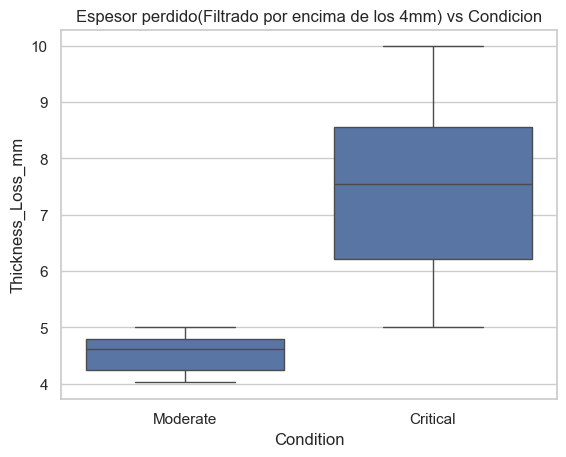

In [121]:
sns.boxplot(data=df[df['Thickness_Loss_mm']>4],x='Condition',y='Thickness_Loss_mm')
plt.title("Espesor perdido(Filtrado por encima de los 4mm) vs Condicion")

Analicemos los valores de las variables que interactuan en la perdida de espesor de 6mm

In [122]:
df_6mm = df[(df["Thickness_Loss_mm"] >= 5.5) ]


In [123]:
df_6mm.head()

,Pipe_Size_mm,Thickness_mm,Material,Grade,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Condition,Mantenimiento_Necesario
1,800,22.00,PVC,ASTM A106 Grade B,150,14.1,7.38,7.32,33.27,4,Critical,1
2,400,12.05,Carbon Steel,API 5L X52,2500,0.6,2.12,6.32,52.45,7,Critical,1
3,1500,38.72,Carbon Steel,API 5L X42,1500,52.7,5.58,6.20,16.01,19,Critical,1
4,1500,24.32,HDPE,API 5L X65,1500,11.7,12.29,8.58,35.28,20,Critical,1
6,200,9.94,Carbon Steel,ASTM A106 Grade B,1500,89.6,1.34,5.86,58.95,6,Critical,1


In [124]:
#Analicemos nuestras presiones y temperaturas
df_6mm[["Max_Pressure_psi", "Temperature_C"]].mean()

Max_Pressure_psi    1011.877828
Temperature_C         43.203167
dtype: float64

El material influye mucho en el deterioro de las tuberias?
Hay un material que tenga mayor probabilidad de sufrir deterioro?

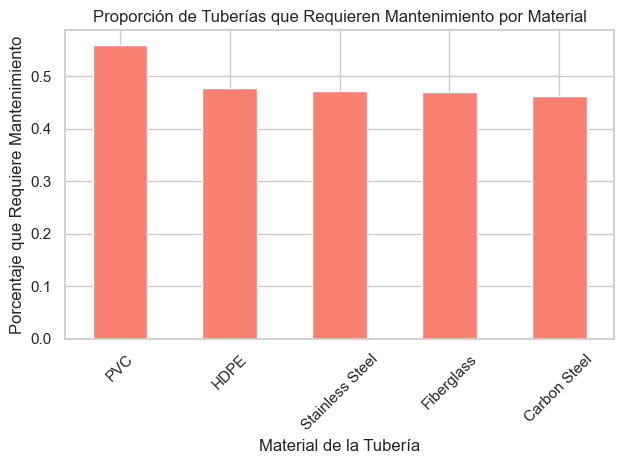

In [125]:
#Analicemos con un grafico
mantenimiento_por_material = df.groupby("Material")["Mantenimiento_Necesario"].mean().sort_values(ascending=False)

# Graficamos
mantenimiento_por_material.plot(kind="bar", color="salmon")

plt.title("Proporción de Tuberías que Requieren Mantenimiento por Material")
plt.xlabel("Material de la Tubería")
plt.ylabel("Porcentaje que Requiere Mantenimiento")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [126]:
df.columns

Index(['Pipe_Size_mm', 'Thickness_mm', 'Material', 'Grade', 'Max_Pressure_psi',
       'Temperature_C', 'Corrosion_Impact_Percent', 'Thickness_Loss_mm',
       'Material_Loss_Percent', 'Time_Years', 'Condition',
       'Mantenimiento_Necesario'],
      dtype='object')

In [127]:
corr=df[['Max_Pressure_psi',
       'Temperature_C', 'Corrosion_Impact_Percent', 'Thickness_Loss_mm',
       'Material_Loss_Percent', 'Time_Years','Pipe_Size_mm', 'Thickness_mm']].corr()

In [128]:
corr

,Max_Pressure_psi,Temperature_C,Corrosion_Impact_Percent,Thickness_Loss_mm,Material_Loss_Percent,Time_Years,Pipe_Size_mm,Thickness_mm
Max_Pressure_psi,1.000000,0.011480,-0.024628,0.026025,0.007957,0.061999,0.005314,0.031811
Temperature_C,0.011480,1.000000,-0.012171,0.010826,0.004227,-0.024172,0.033515,0.035808
Corrosion_Impact_Percent,-0.024628,-0.012171,1.000000,0.008548,0.026738,-0.024244,-0.029507,-0.035593
Thickness_Loss_mm,0.026025,0.010826,0.008548,1.000000,0.576865,-0.012600,0.063189,0.049979
Material_Loss_Percent,0.007957,0.004227,0.026738,0.576865,1.000000,0.006085,-0.486962,-0.535069
Time_Years,0.061999,-0.024172,-0.024244,-0.012600,0.006085,1.000000,-0.038725,-0.054131
Pipe_Size_mm,0.005314,0.033515,-0.029507,0.063189,-0.486962,-0.038725,1.000000,0.907295
Thickness_mm,0.031811,0.035808,-0.035593,0.049979,-0.535069,-0.054131,0.907295,1.000000


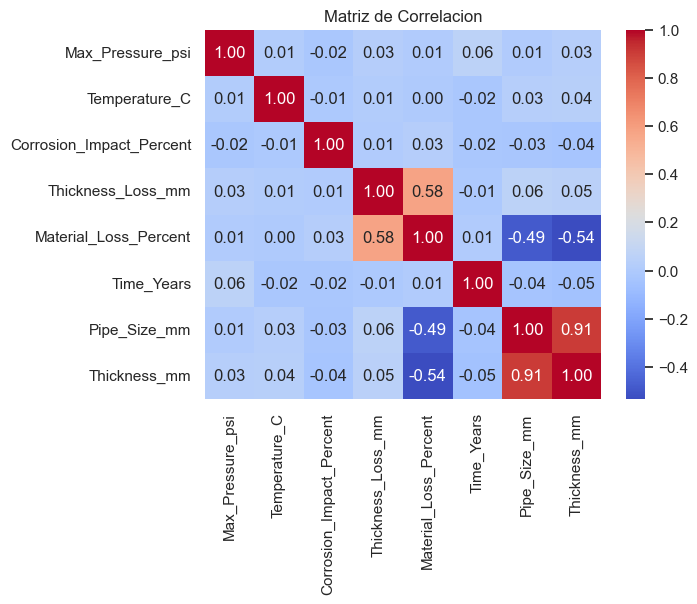

In [129]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Matriz de Correlacion")
plt.show()

INGENIERÍA DE CARACTERÍSTICAS Y ENTRENAMIENTO DE UN MODELO DE APRENDIZAJE

In [130]:
df['Mantenimiento_Necesario'].value_counts()

Mantenimiento_Necesario
0    513
1    487
Name: count, dtype: int64

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [132]:
df.columns

Index(['Pipe_Size_mm', 'Thickness_mm', 'Material', 'Grade', 'Max_Pressure_psi',
       'Temperature_C', 'Corrosion_Impact_Percent', 'Thickness_Loss_mm',
       'Material_Loss_Percent', 'Time_Years', 'Condition',
       'Mantenimiento_Necesario'],
      dtype='object')

In [133]:
df_model=df.drop(['Pipe_Size_mm','Grade','Material','Temperature_C','Material_Loss_Percent'],axis=1)

In [134]:
df_model.head(2)

,Thickness_mm,Max_Pressure_psi,Corrosion_Impact_Percent,Thickness_Loss_mm,Time_Years,Condition,Mantenimiento_Necesario
0,15.48,300,16.04,4.91,2,Moderate,0
1,22.00,150,7.38,7.32,4,Critical,1


In [135]:
df_model.columns

Index(['Thickness_mm', 'Max_Pressure_psi', 'Corrosion_Impact_Percent',
       'Thickness_Loss_mm', 'Time_Years', 'Condition',
       'Mantenimiento_Necesario'],
      dtype='object')

In [136]:
numeric=['Max_Pressure_psi',
       'Corrosion_Impact_Percent', 'Thickness_Loss_mm', 'Time_Years',
       'Thickness_mm']

In [137]:
X = df_model.drop(columns=['Mantenimiento_Necesario', 'Condition'])  # X: variables predictoras
y = df_model['Mantenimiento_Necesario'] 

In [138]:
preprocesador=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numeric),
      
    ],
    remainder="drop"
)

In [139]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocesador),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [140]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4
)

In [141]:
pipeline.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Prediccion con el modelo

In [142]:
#Aplica el preprocesamiento y luego hace predicciones 
# sobre el conjunto de prueba x_test
y_pred=pipeline.predict(X_test)

Reporte de Clasificación

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [144]:
confusion_matrix(y_test,y_pred)

array([[118,   0],
       [  0,  82]], dtype=int64)

In [145]:
pipeline.score(X_test,y_test)*100

100.0

Probemos con una validacion cruzada

In [146]:
from sklearn.model_selection import cross_validate

In [147]:
result=cross_validate(pipeline,X,y,cv=6,
                      scoring=['accuracy','precision','recall','f1'])

In [148]:
print("Accuracy promedio:", result['test_accuracy'].mean()*100)
print("Precision promedio:", result['test_precision'].mean()*100)
print("Recall promedio:", result['test_recall'].mean()*100)
print("F1-score promedio:", result['test_f1'].mean()*100)

Accuracy promedio: 100.0
Precision promedio: 100.0
Recall promedio: 100.0
F1-score promedio: 100.0


In [149]:
import joblib
joblib.dump(pipeline,"deteccion_critica_tuberia_pipeline.pkl")

['deteccion_critica_tuberia_pipeline.pkl']